# Preprocess Data

In [42]:
import pandas as pd
import os

DataSets_PATH = "/kaggle/input/uber-dataset"
DataFrame = pd.read_csv(os.path.join(DataSets_PATH, "taxi_pickups_area.csv"))
DataFrame.fillna(0, inplace=True)

## Mean Absolute Error Function

In [43]:
def get_MAE(df1, df2):
    assert df1.shape == df2.shape, "DataFrames must have the same shape!"
    mae = (df1 - df2).abs().mean().mean()
    print(f'Mean Absolute Error (MAE): {mae}')

## Preprocessing the TimeStamp

In [44]:
DataFrame["Trip Start Timestamp"] = pd.to_datetime(DataFrame["Trip Start Timestamp"])

In [45]:
if not DataFrame.index.name == "Trip Start Timestamp":
    DataFrame.set_index('Trip Start Timestamp', inplace=True)
    DataFrame = DataFrame.astype(int)

In [46]:
## Ploting the Trend/Seasonality/Noise

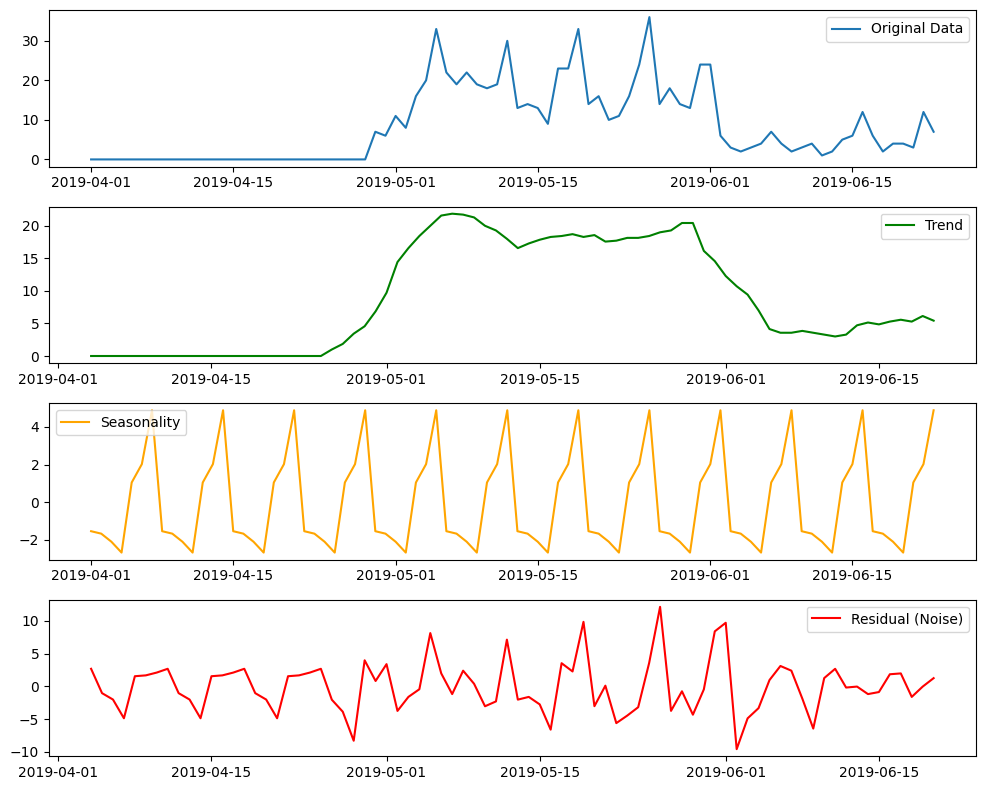

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


DataFrame_plot = DataFrame.asfreq('D')
decomposition = seasonal_decompose(DataFrame_plot['Pickup Community Area_0'], model='additive')

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(DataFrame_plot['Pickup Community Area_0'], label='Original Data')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual (Noise)', color='red')
plt.legend()

plt.tight_layout()
plt.show()

DataFrame_plot = None

## Splitting Data To train models

In [48]:
num_intervals = 673
DataFrame_train = DataFrame[:-num_intervals]
DataFrame_test = DataFrame[-num_intervals:]

# Naive Average

In [49]:
import numpy as np

naive_avg = DataFrame_train.mean()

naive_avg_df = pd.DataFrame(index = DataFrame_test.index, columns = DataFrame_test.columns, dtype=int)
naive_avg_df = naive_avg_df.fillna(naive_avg).round().astype(int)

print("Naïve Average:", naive_avg)
naive_avg_df.head()

Naïve Average: Pickup Community Area_0     16.601678
Pickup Community Area_1      1.165472
Pickup Community Area_2      1.159654
Pickup Community Area_3      2.805439
Pickup Community Area_4      0.920173
                              ...    
Pickup Community Area_73     0.104722
Pickup Community Area_74     0.011636
Pickup Community Area_75     0.069003
Pickup Community Area_76    32.459478
Pickup Community Area_77     2.224597
Length: 78, dtype: float64


,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-16 23:45:00,17,1,1,3,1,1,10,6,90,0,...,0,0,0,0,0,0,0,0,32,2
2019-06-17 00:00:00,17,1,1,3,1,1,10,6,90,0,...,0,0,0,0,0,0,0,0,32,2
2019-06-17 00:15:00,17,1,1,3,1,1,10,6,90,0,...,0,0,0,0,0,0,0,0,32,2
2019-06-17 00:30:00,17,1,1,3,1,1,10,6,90,0,...,0,0,0,0,0,0,0,0,32,2
2019-06-17 00:45:00,17,1,1,3,1,1,10,6,90,0,...,0,0,0,0,0,0,0,0,32,2


## MAE Naive

In [50]:
get_MAE(DataFrame_test, naive_avg_df)

Mean Absolute Error (MAE): 3.054958661942317


# Moving Averages

In [51]:
mv_avg_df_train = DataFrame_train[-num_intervals:]
empty_next_mv_avg_df = pd.DataFrame(index=DataFrame_test.index, columns=DataFrame_test.columns)
mv_avg_df = pd.concat([mv_avg_df_train, empty_next_mv_avg_df], axis=0)
for key, _ in enumerate(mv_avg_df[num_intervals:].iterrows()):
    split_df = mv_avg_df[key:key+num_intervals].mean()
    mv_avg_df.iloc[key+num_intervals] = split_df

mv_avg_df = mv_avg_df[-num_intervals:].round().astype(int)
mv_avg_df

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-16 23:45:00,6,0,0,0,0,0,2,1,22,0,...,0,0,0,0,0,0,0,0,6,0
2019-06-17 00:00:00,6,0,0,0,0,0,2,1,22,0,...,0,0,0,0,0,0,0,0,6,0
2019-06-17 00:15:00,6,0,0,0,0,0,2,1,22,0,...,0,0,0,0,0,0,0,0,6,0
2019-06-17 00:30:00,6,0,0,0,0,0,2,1,22,0,...,0,0,0,0,0,0,0,0,6,0
2019-06-17 00:45:00,6,0,0,0,0,0,2,1,22,0,...,0,0,0,0,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-23 22:45:00,6,0,0,0,0,0,2,1,21,0,...,0,0,0,0,0,0,0,0,6,0
2019-06-23 23:00:00,6,0,0,0,0,0,2,1,21,0,...,0,0,0,0,0,0,0,0,6,0
2019-06-23 23:15:00,6,0,0,0,0,0,2,1,21,0,...,0,0,0,0,0,0,0,0,6,0


## MAE Moving_AVG

In [52]:
get_MAE(DataFrame_test, mv_avg_df)

Mean Absolute Error (MAE): 0.6010401188707283


# Exponential Smoothing Algorithms

## Simple Exponential Smoothing (SES)

- Used for time series data with no trend or seasonality.

SES function : U(Xt) = a * Xt + (1 - a) * U(Xt-1).

a = 2/(N+1)

with a is the smoothing factor

In [53]:
def EMA_func(value, prev_ema, span=4):
    alpha = 2/(span+1)
    ema = alpha * value + (1 - alpha) * prev_ema

    return ema


In [54]:
#Calculate the current EMA for the Data Train
EMA_df_train = pd.DataFrame(index=DataFrame_train.index, columns=DataFrame_train.columns)
for key, _ in enumerate(DataFrame_train.iterrows()):
    if key == 0:
        EMA_df_train.iloc[key] = DataFrame_train.iloc[key]
        continue
    EMA_df_train.iloc[key] = EMA_func(DataFrame_train.iloc[key], DataFrame_train.iloc[key-1])

EMA_df_train

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2019-04-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.0
2019-04-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.4,0.0
2019-04-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,1.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0
2019-04-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-16 22:30:00,5.0,0.0,0.0,0.4,0.0,0.0,1.0,0.6,8.0,0.0,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,17.8,0.0
2019-06-16 22:45:00,2.4,0.0,0.0,0.6,0.0,0.0,0.6,0.0,8.0,0.0,...,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,10.0,0.0
2019-06-16 23:00:00,3.4,0.0,0.0,0.4,0.0,0.0,0.4,0.4,8.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.8,0.0


In [55]:
next_EMA_df = pd.DataFrame(index=DataFrame_test.index, columns=DataFrame_test.columns)

for key, _ in enumerate(next_EMA_df.iterrows()):
    if key == 0:
        ema = EMA_df_train.iloc[-1]
    else:
        ema = next_EMA_df.iloc[key-1]
    next_EMA_df.iloc[key] = EMA_func(ema, ema)

next_EMA_df = next_EMA_df.round().astype(int)
next_EMA_df

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-16 23:45:00,2,0,0,0,0,0,1,0,4,0,...,0,0,0,0,0,0,0,0,12,0
2019-06-17 00:00:00,2,0,0,0,0,0,1,0,4,0,...,0,0,0,0,0,0,0,0,12,0
2019-06-17 00:15:00,2,0,0,0,0,0,1,0,4,0,...,0,0,0,0,0,0,0,0,12,0
2019-06-17 00:30:00,2,0,0,0,0,0,1,0,4,0,...,0,0,0,0,0,0,0,0,12,0
2019-06-17 00:45:00,2,0,0,0,0,0,1,0,4,0,...,0,0,0,0,0,0,0,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-23 22:45:00,2,0,0,0,0,0,1,0,4,0,...,0,0,0,0,0,0,0,0,12,0
2019-06-23 23:00:00,2,0,0,0,0,0,1,0,4,0,...,0,0,0,0,0,0,0,0,12,0
2019-06-23 23:15:00,2,0,0,0,0,0,1,0,4,0,...,0,0,0,0,0,0,0,0,12,0


### MAE

In [56]:
get_MAE(DataFrame_test, next_EMA_df)

Mean Absolute Error (MAE): 0.8176744008839106


## Holt’s Exponential Smoothing (Double Exponential Smoothing)

- Used for time series data with trend but no seasonality.

Math func:
```
Level : L(Xt) = a * Xt + (1 - a) * (L(Xt-1) + B(Xt-1))
Trend : B(Xt) = b *(L(Xt) - L(Xt-1)) + (1 - b) * B(Xt-1)
Forecast : F(Xt+h) = L(Xt) + h*B(Xt)
```

with:
- Xt : the actual value of the time series at time
- L(Xt) : estimated level at time t
- B(Xt) : estimated trend at time t
- F(Xt+h) : forecast for time t + h
- a, b : smoothing parameters
- h : steps ahead to forecast

In [57]:
def Level(df, level_df, trend_df, t, alpha):
    return alpha * df.iloc[t] + (1 - alpha) * (level_df.iloc[t-1] + trend_df.iloc[t-1])

def Trend(level_df, trend_df, t, beta):
    return beta * (level_df.iloc[t] - level_df.iloc[t-1]) + (1 - beta) * trend_df.iloc[t-1]

def Forecast(level_df, trend_df, t, h):
    if t - h < 0:
        raise ValueError("Forecast: Cannot index negative.")
    return level_df.iloc[t-h] + (h * trend_df.iloc[t-h])

In [58]:
DES_level = pd.DataFrame(index=DataFrame_train.index, columns=DataFrame_train.columns)
DES_trend = DES_level.copy()
DES_forcast = DES_level.copy()
DES_level.iloc[0] = DataFrame_train.iloc[0]
DES_trend.iloc[0] = DataFrame_train.iloc[1] - DataFrame_train.iloc[0]
DES_forcast.iloc[0] = DataFrame_train.iloc[0]

alpha = 0.1
beta = 0.1
h = 1

for t in range(1, len(DataFrame_train)):
    DES_level.iloc[t] = Level(DataFrame_train, DES_level, DES_trend, t, alpha)
    DES_trend.iloc[t] = Trend(DES_level, DES_trend, t, beta)
    if h <= t:
        DES_forcast.iloc[t] = Forecast(DES_level, DES_trend, t, h)

DES_level = None
DES_trend = None

DES_forcast


,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2019-04-01 00:15:00,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,0
2019-04-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2019-04-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2019-04-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.11,0.0,3.78,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.67,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-16 22:30:00,6.944118,0.070241,-0.018565,0.340208,0.034125,0.114926,0.68351,1.30908,7.470969,-0.015262,...,0.069601,-0.022562,0.032069,0.050656,-0.012031,-0.006163,0.0,-0.021761,16.852784,0.173743
2019-06-16 22:45:00,6.420741,0.052951,-0.024304,0.385761,0.029281,0.094409,0.671784,1.13393,6.900212,-0.01604,...,0.061073,-0.024621,0.026663,0.154648,-0.011111,-0.011431,0.0,-0.020885,16.404481,0.154367
2019-06-16 23:00:00,6.015495,0.03686,-0.029226,0.322901,0.024629,0.075,0.554513,0.964955,6.397528,-0.016579,...,0.052787,-0.026228,0.021531,0.146694,-0.010172,-0.016059,0.0,-0.019889,15.936964,0.135384


In [59]:
next_DES_df = pd.DataFrame(index=DataFrame_test.index, columns=DataFrame_test.columns)
next_DES_df.iloc[:] = DES_forcast.iloc[-1]
next_DES_df = next_DES_df.round().astype(int)

DES_forcast = None

next_DES_df

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-16 23:45:00,5,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,15,0
2019-06-17 00:00:00,5,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,15,0
2019-06-17 00:15:00,5,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,15,0
2019-06-17 00:30:00,5,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,15,0
2019-06-17 00:45:00,5,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-23 22:45:00,5,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,15,0
2019-06-23 23:00:00,5,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,15,0
2019-06-23 23:15:00,5,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,15,0


### MAE

In [60]:
get_MAE(DataFrame_test, next_DES_df)

Mean Absolute Error (MAE): 0.8040537966243763


## Holt-Winters Exponential Smoothing (Triple Exponential Smoothing)

- Used for time series data with trend and seasonality.

Math func:
```
Level : L(Xt) = a * (Xt - (S(Xt-m)) + (1 - a) * (L(Xt-1) + B(Xt-1))
Trend : B(Xt) = b *(L(Xt) - L(Xt-1)) + (1 - b) * B(Xt-1)
Seasonal : S(Xt) = g * ( Xt - L(Xt-1) - B(Xt-1) ) + (1 - g) * S(Xt-m)
Forecast : F(Xt+h) = L(Xt) + h*B(Xt) + S(Xt+h-m)
```

with:
- m : season length (e.g., 96 for daily seasonality with 15min intervals)
- g : seasonal smoothing parameter
- Xt : the actual value of the time series at time
- S(Xt) : seasonal component
- L(Xt) : estimated level at time t
- B(Xt) : estimated trend at time t
- F(Xt+h) : forecast for time t + h
- a, b : smoothing parameters
- h : steps ahead to forecast

In [61]:
def Level(df, level_df, trend_df, Seasonal_df, t, m, alpha):
    if t - m < 0:
        raise ValueError("Level: Cannot index negative.")
    return alpha * (df.iloc[t] - Seasonal_df.iloc[t-m]) + (1 - alpha) * (level_df.iloc[t-1] + trend_df.iloc[t-1])

def Trend(level_df, trend_df, t, beta):
    return beta * (level_df.iloc[t] - level_df.iloc[t-1]) + (1 - beta) * trend_df.iloc[t-1]

def Seasonal(df, level_df, trend_df, Seasonal_df, t, m, gamma):
    if t - m < 0:
        return 0
    return gamma * (df.iloc[t] - level_df.iloc[t-1] - trend_df.iloc[t-1]) + (1 - gamma) * Seasonal_df.iloc[t-m]

def Forecast(level_df, trend_df, Seasonal_df, t, m, h):
    if t + h - m < 0 or t - h < 0:
        raise ValueError("Forecast: Cannot index negative.")
    return level_df.iloc[t-h] + (h * trend_df.iloc[t-h]) + Seasonal_df.iloc[t+h-m]

In [62]:
TES_level = pd.DataFrame(index=DataFrame_train.index, columns=DataFrame_train.columns)
TES_trend = TES_level.copy()
TES_seasonal = TES_level.copy()
TES_forcast = TES_level.copy()

h = 1
m = 4
alpha = 0.1
beta = 0.1
gamma = 0.1

for i in range(m):
    TES_level.iloc[i] = DataFrame_train.iloc[i]
    TES_seasonal.iloc[i] = 1
    TES_forcast.iloc[i] = DataFrame_train.iloc[i]
    TES_trend.iloc[i] = DataFrame_train.iloc[i+1] - DataFrame_train.iloc[i]

for t in range(m, len(DataFrame_train)):
    TES_level.iloc[t] = Level(DataFrame_train, TES_level, TES_trend, TES_seasonal, t, m, alpha)
    TES_trend.iloc[t] = Trend(TES_level, TES_trend, t, beta)
    TES_seasonal.iloc[t] = Seasonal(DataFrame_train, TES_level, TES_trend, TES_seasonal, t, m, gamma)
    TES_forcast.iloc[t] = Forecast(TES_level, TES_trend, TES_seasonal, t, m, h)

TES_forcast

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2019-04-01 00:15:00,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,0
2019-04-01 00:30:00,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,3,0
2019-04-01 00:45:00,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2019-04-01 01:00:00,1,1,1,1,1,1,2,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-16 22:30:00,6.795934,0.068439,-0.109379,0.508227,-0.033224,0.184873,0.219041,1.582574,7.534284,0.024816,...,0.076526,-0.031653,0.005071,0.013981,-0.01466,-0.053586,0.0,0.013297,16.334884,0.27524
2019-06-16 22:45:00,7.476201,-0.014678,0.044739,0.489734,-0.025322,-0.035281,1.061744,1.183156,7.208026,-0.022228,...,0.111151,0.049546,-0.002924,0.124198,-0.013984,-0.048398,-0.0,-0.030451,15.177629,0.03805
2019-06-16 23:00:00,5.632076,-0.040511,-0.027039,-0.13679,0.062973,0.106315,0.656334,0.888656,6.566699,-0.025771,...,0.053909,-0.047117,-0.011021,0.191462,-0.01476,0.060328,-0.0,-0.03249,17.422549,0.164676


In [63]:
empty_df = pd.DataFrame(index=DataFrame_test.index, columns=DataFrame_test.columns)
next_TES_lvl_df = pd.concat([TES_level, empty_df], axis=0)
next_TES_trd_df = pd.concat([TES_trend, empty_df], axis=0)
next_TES_season_df = pd.concat([TES_seasonal, empty_df], axis=0)
next_TES_forc_df = pd.concat([TES_forcast, empty_df], axis=0)

last_index = len(TES_forcast)

for t in range(last_index, last_index + len(empty_df)):
    next_TES_lvl_df.iloc[t] = Level(next_TES_forc_df, next_TES_lvl_df, next_TES_trd_df, next_TES_season_df, t-1, m, alpha)
    next_TES_trd_df.iloc[t] = Trend(next_TES_lvl_df, next_TES_trd_df, t-1, beta)
    next_TES_season_df.iloc[t] = Seasonal(next_TES_forc_df, next_TES_lvl_df, next_TES_trd_df, next_TES_season_df, t-1, m, gamma)
    next_TES_forc_df.iloc[t] = Forecast(next_TES_lvl_df, next_TES_trd_df, next_TES_season_df, t-1, m, h)

next_TES_df = next_TES_forc_df.iloc[-len(empty_df):]
next_TES_df = next_TES_df.round().astype(int)

TES_level = None
TES_trend = None
TES_seasonal = None
TES_forcast = None
next_TES_lvl_df = None
next_TES_trd_df = None
next_TES_season_df = None
next_TES_forc_df = None

next_TES_df

,Pickup Community Area_0,Pickup Community Area_1,Pickup Community Area_2,Pickup Community Area_3,Pickup Community Area_4,Pickup Community Area_5,Pickup Community Area_6,Pickup Community Area_7,Pickup Community Area_8,Pickup Community Area_9,...,Pickup Community Area_68,Pickup Community Area_69,Pickup Community Area_70,Pickup Community Area_71,Pickup Community Area_72,Pickup Community Area_73,Pickup Community Area_74,Pickup Community Area_75,Pickup Community Area_76,Pickup Community Area_77
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-16 23:45:00,4,0,0,0,0,0,0,1,5,0,...,0,0,0,0,0,0,0,0,14,0
2019-06-17 00:00:00,5,0,0,0,0,0,1,0,5,0,...,0,0,0,0,0,0,0,0,13,0
2019-06-17 00:15:00,4,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,16,0
2019-06-17 00:30:00,4,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,14,0
2019-06-17 00:45:00,4,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-23 22:45:00,2,0,0,0,0,0,0,0,-2,0,...,0,0,0,0,0,0,0,0,16,0
2019-06-23 23:00:00,2,0,0,0,0,0,0,0,-2,0,...,0,0,0,0,0,0,0,0,16,0
2019-06-23 23:15:00,2,0,0,0,0,0,0,0,-2,0,...,0,0,0,0,0,0,0,0,15,0


### MAE

In [64]:
get_MAE(DataFrame_test, next_TES_df)

Mean Absolute Error (MAE): 0.9489655960681223


# ARIMA

### TODO: predict Next predictions using this func

In [65]:
future_timestamps = pd.date_range(start=DataFrame_train.index[-1] + pd.Timedelta(minutes=15), periods=num_intervals, freq='15min')